### AdaBoost algorithm
rewriting of the following code:https://hubpages.com/technology/Adaboost-in-Python<br>so happens that same example applies in http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/boosting.pdf.  Results tie with slides 17-20.<br>a helpful resource: http://mccormickml.com/2013/12/13/adaboost-tutorial/

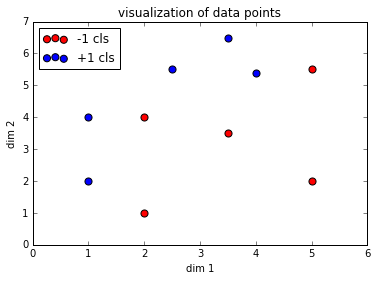


iteration 1 
Dist [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
['wrong', 'wrong', 'wrong', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct', 'correct']
prenorm'd [1.53, 1.53, 1.53, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65]
dist_t [0.15, 0.15, 0.15, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07]
  eps 1   0.3
alpha 1   0.42
    Z 1   0.92

iteration 2 
Dist [0.17, 0.17, 0.17, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07]
['correct', 'correct', 'correct', 'correct', 'correct', 'wrong', 'wrong', 'correct', 'wrong', 'correct']
prenorm'd [0.52, 0.52, 0.52, 0.52, 0.52, 1.91, 1.91, 0.52, 1.91, 0.52]
dist_t [0.09, 0.09, 0.09, 0.04, 0.04, 0.14, 0.14, 0.04, 0.14, 0.04]
  eps 2   0.21
alpha 2   0.65
    Z 2   0.82

iteration 3 
Dist [0.11, 0.11, 0.11, 0.05, 0.05, 0.17, 0.17, 0.05, 0.17, 0.05]
['correct', 'correct', 'correct', 'wrong', 'wrong', 'correct', 'correct', 'wrong', 'correct', 'correct']
prenorm'd [0.4, 0.4, 0.4, 2.52, 2.52, 0.4, 0.4, 2.52, 0.4, 0.4]
dist_t [0.04, 0.04, 0.04

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def h(point, index, split_value, comparison_operator): 
    '''
    Hypothesis function relating to decision-stump classifiers. 
    
    Parameters
      index               -  number associated with given feature
      split_value         -  value used to split the training points into two groups
      comparison_operator -  if string value equals 'less', less-than operator is used, 
                             otherwise greater than operator will be used
   
                     example                     computes 
          (point[index] < split_value)      :  True, or False
      2 * (point[index] < split_value)      :  2, or 0 
      2 * (point[index] > split_value) - 1  :  +1, or -1
      
    Returns               -  value of predicted label, +1 or -1
    '''
    if comparison_operator == 'less':
        return 2 * (point[index] < split_value) - 1
    else:
        return 2 * (point[index] > split_value) - 1

# load data
data = np.array([
[2.5,5.5, 1],  
[3.5,6.5, 1], 
[4,  5.4, 1], 
[5,  5.5,-1], 
[1,  4,   1], 
[2,  4,  -1], 
[3.5,3.5,-1], 
[1,  2,   1],
[2,  1,  -1], 
[5,  2,  -1]
])

N = len( data.tolist() )

# sort points by class, and axis
negv, negh, posv, posh = [], [], [], []
for i in range(N):
    if data[i][-1] == -1:
        negv.append(data[:,0][i])
        negh.append(data[:,1][i])
    else:
        posv.append(data[:,0][i])
        posh.append(data[:,1][i])
        
# visualize
plt.scatter(negv, negh, c='r', marker = 'o', s=50, label='-1 cls')
plt.scatter(posv, posh, c='b', marker = 'o', s=50, label='+1 cls')
xp = np.linspace(0, 5, 50)
plt.xlabel("dim 1")
plt.ylabel("dim 2")
plt.legend(loc='upper left')
plt.title('visualization of data points')
plt.show()

# initialize Dist, alphas
Dist = np.ones(N) / N 
alphas = []

# decision stumps
stumps = []
stumps.append( {'index':0, 'value':1.5, 'oper':'less'   } ) 
stumps.append( {'index':0, 'value':4.5, 'oper':'less'   } )
stumps.append( {'index':1, 'value':5  , 'oper':'greater'} )

# main loop
count = 1
for s in stumps:
    print '\niteration', count, '\nDist', [round(d,2) for d in Dist]

    # retrive stump details from dictionary
    ix, val, op = s['index'], s['value'], s['oper']
    
    # compute errors, as list of booleans
    errors = np.array( [point[-1] != h(point, ix, val, op) for point in data] )
    print ['correct' if err==False else 'wrong' for err in errors]

    # compute epsillon
    eps = sum( errors * Dist )
    
    # compute alpha_t
    alpha_t = 0.5 * np.log( (1 - eps) / eps )
   
    # compute dist_t
    dist_t = np.zeros(N)     
    for i in range(N):
        if errors[i] == 1: 
            dist_t[i] = Dist[i] * np.exp(alpha_t)
        else: 
            dist_t[i] = Dist[i] * np.exp(-alpha_t)
    pre_normalized = dist_t / Dist
    print "prenorm'd", [round(w,2) for w in pre_normalized]
    print 'dist_t', [round(d,2) for d in dist_t]

    # update Distribution
    Z_t = dist_t.sum()
    Dist = dist_t / Z_t

    print '  eps', count, ' ', round(eps, 2)
    print 'alpha', count, ' ', round(alpha_t, 2)    
    print '    Z', count, ' ', round(Z_t, 2)

    count += 1

### AdaBoost algorithm (above, as object class)

In [2]:
from __future__ import division

def h(point, index, split_value, comparison_operator): 
    if comparison_operator == 'less':
        return 2 * (point[index] < split_value) - 1
    else:
        return 2 * (point[index] > split_value) - 1
        
class AdaBoost:
 
    def __init__(self, data, numLearners):
        self.data = data                     # training data 
        self.N = len(self.data)              # number of training points
        self.numLearners = numLearners       # number of decision-stumps 
        self.alphas = []                     # one real-value per decision-stump
        self.stumps = []                     # one dictionary per decision-stump
        self.Dist = np.ones(self.N)/self.N   # probability distribution
        
    def train(self):
        comparisons = ['less','greater']
        for i in range(self.numLearners):
            min_eps = 999
            # search for decision-stump with lowest epsillon,
            # loop by operator, then by feature and row of training-data
            for op in comparisons:
                for ix in range( len(self.data[0]) - 1 ):
                    for row in self.data:   
                        errs = np.array( [pt[-1] != h(pt, ix, row[ix], op) for pt in self.data] )
                        eps = sum( errs * self.Dist )
                        if eps < min_eps:
                            idx, val, oper, min_eps, errors = ix, row[ix], op, eps, errs               
            # update probabilty distribution for next learner
            dist = np.zeros(self.N)     
            alpha = 0.5 * np.log( (1 - min_eps) / min_eps )
            for i in range(self.N):
                if errors[i] == 1: 
                    dist[i] = self.Dist[i] * np.exp(alpha)
                else: 
                    dist[i] = self.Dist[i] * np.exp(-alpha) 
            self.Dist = dist / dist.sum()
            # store classifier and alpha in model
            self.stumps.append( {'index':idx, 'value':val, 'compare':oper} ) 
            self.alphas.append(alpha)
                               
# data is from AdaBoost example 1 (above)
numLearners = 3  # number of decision-stumps, set by user
m = AdaBoost(data, numLearners)
m.train()
m.alphas

[0.42364893019360172, 0.64964149206513044, 0.92291334524916546]